# Correlation of Data with MERRA2


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [27]:
import datetime
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [99]:
import datetime as dt

In [28]:
object_name='HD14943'
infos='ctioNov2016'

In [29]:
logfile='logbk_'+object_name+'_'+infos+'.csv'

In [30]:
df_data=pd.read_csv(logfile)
df_data.index=df_data['date']

In [31]:
df_data

,Unnamed: 0,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
date,,,,,,,,,,,,
2016-11-23T01:45:29.665,0,1,1.101,2016-11-23T01:45:29.665,2016_11_23T01_45_51,20.0,24.718000,9.0,776.0,64.0,5.400000,1.522
2016-11-23T01:46:33.179,1,2,1.100,2016-11-23T01:46:33.179,2016_11_23T01_46_55,20.0,24.613001,9.0,776.0,64.0,6.600000,1.371
2016-11-23T01:47:36.699,2,3,1.099,2016-11-23T01:47:36.699,2016_11_23T01_47_58,20.0,24.509001,9.0,776.0,64.0,7.800000,1.399
2016-11-23T01:52:00.166,3,4,1.095,2016-11-23T01:52:00.166,2016_11_23T01_52_42,40.0,24.090000,8.9,776.0,64.0,5.000000,1.357
2016-11-23T01:53:23.679,4,5,1.094,2016-11-23T01:53:23.679,2016_11_23T01_54_05,40.0,23.961000,8.9,776.0,64.0,4.500000,1.304
2016-11-23T01:54:47.200,5,6,1.093,2016-11-23T01:54:47.200,2016_11_23T01_55_29,40.0,23.834000,9.0,776.0,64.0,6.000000,1.409
2016-11-23T02:26:40.568,6,7,1.075,2016-11-23T02:26:40.568,2016_11_23T02_27_22,40.0,21.587999,8.7,776.0,66.0,7.800000,1.713
2016-11-23T02:28:04.083,7,8,1.075,2016-11-23T02:28:04.083,2016_11_23T02_28_46,40.0,21.523001,8.7,776.0,66.0,10.000000,2.030
2016-11-23T02:29:27.596,8,9,1.074,2016-11-23T02:29:27.596,2016_11_23T02_30_09,40.0,21.459000,8.7,776.0,66.0,9.500000,2.288


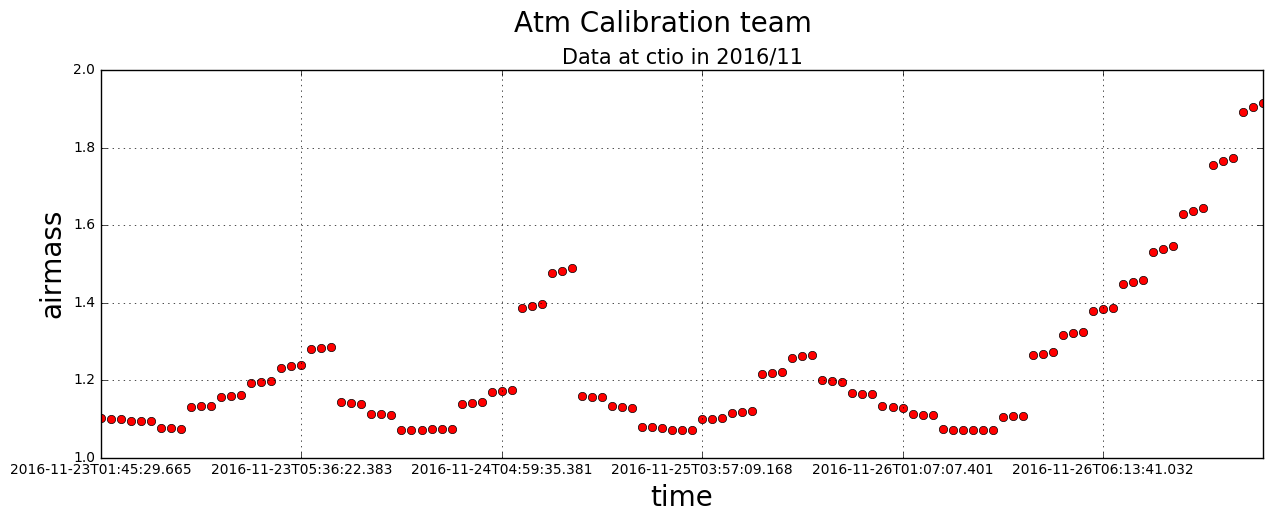

In [87]:
fig = plt.figure(figsize=(15,5), dpi=300)
ax=fig.add_subplot(111)
df_data.index=df_data['date']
df_data['airmass'].plot(lw=0,marker='o',color='red',subplots=True)
#ax=df_data.plot('date','airmass',subplots=True)
ax.set_xlabel('time',fontsize=20)
ax.set_ylabel('airmass',fontsize=20)
title= "Data at {} in 2016/{}".format(OBS_NAME,MONTH_NAME)
ax.set_title(title,fontsize=15)
fig.suptitle('Atm Calibration team', y=1.02, fontsize=20)
ax.grid(True)

In [105]:
mydate=df_data['date'][0]
print mydate

2016-11-23T01:45:29.665


In [155]:
NDATATIMES=len(df_data['date'])

In [113]:
pd.to_datetime(df_data['date'][0])

Timestamp('2016-11-23 01:45:29.665000')

### convert in format without T

In [156]:
new_date_format= [pd.to_datetime(df_data['date'][i]) for i in range(NDATATIMES)]

In [122]:
new_date_format

[Timestamp('2016-11-23 01:45:29.665000'),
 Timestamp('2016-11-23 01:46:33.179000'),
 Timestamp('2016-11-23 01:47:36.699000'),
 Timestamp('2016-11-23 01:52:00.166000'),
 Timestamp('2016-11-23 01:53:23.679000'),
 Timestamp('2016-11-23 01:54:47.200000'),
 Timestamp('2016-11-23 02:26:40.568000'),
 Timestamp('2016-11-23 02:28:04.083000'),
 Timestamp('2016-11-23 02:29:27.596000'),
 Timestamp('2016-11-23 04:35:46.919000'),
 Timestamp('2016-11-23 04:37:10.436000'),
 Timestamp('2016-11-23 04:38:33.949000'),
 Timestamp('2016-11-23 04:54:39.120000'),
 Timestamp('2016-11-23 04:56:02.636000'),
 Timestamp('2016-11-23 04:57:26.154000'),
 Timestamp('2016-11-23 05:14:37.966000'),
 Timestamp('2016-11-23 05:16:01.474000'),
 Timestamp('2016-11-23 05:17:24.986000'),
 Timestamp('2016-11-23 05:33:35.363000'),
 Timestamp('2016-11-23 05:34:58.873000'),
 Timestamp('2016-11-23 05:36:22.383000'),
 Timestamp('2016-11-23 05:52:28.165000'),
 Timestamp('2016-11-23 05:53:51.502000'),
 Timestamp('2016-11-23 05:55:14.84

In [33]:
MONTH_NAME='11' # select november

In [34]:
# SELECT OBSERVATORY
OBS_NAME='ctio'

In [35]:
# The selected data field
DATA_NAME1 =  'tavg1_2d_csp_Nx_M2T1NXCSP'   # 
DATA_NAME2 =  'tavg1_2d_aer_Nx_M2T1NXAER'   # 
DATA_TAG1=['ISCCPCLDFRC','MDSH2OPATH','MDSICEPATH','MDSOPTHCKH2O','MDSOPTHCKICE','MDSOPTHCKTTL']
DATA_TAG2=['TOTANGSTR','TOTEXTTAU','TOTSCATAU']
DATA_TITLE1=['ISCCP Cloud area fraction',
            'MODIS H2O path',
            'MODIS ice path',
            'MODIS H2O optical thickness',
            'MODIS ice optical thickness',
            'MODIS total optical thickness'
           ]
DATA_TITLE2=['Total Aerosol Angstrom parameter 470-870 nm',
            'Total Aerosol Extinction AOT 550 nm',
            'Total Aerosol Scattering AOT 550 nm'
           ]

In [36]:
pandas_filename_csp='MERRA2_2016_'+DATA_NAME1+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'
pandas_filename_aer='MERRA2_2016_'+DATA_NAME2+'_'+OBS_NAME+'_'+MONTH_NAME+'.csv'

In [37]:
merra_csp=pd.read_csv(pandas_filename_csp)
merra_aer=pd.read_csv(pandas_filename_aer)

In [38]:
merra_csp

,time,ISCCPCLDFRC,MDSH2OPATH,MDSICEPATH,MDSOPTHCKH2O,MDSOPTHCKICE,MDSOPTHCKTTL
0,2016-11-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-11-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-01 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-11-01 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-11-01 04:30:00,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-11-01 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-11-01 06:30:00,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-11-01 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-11-01 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-11-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
def PlotTimeSeries(df,data_name,data_title,figfile):
    print data_name
    print data_title
    fig = plt.figure(figsize=(15,5), dpi=300)
    ax=fig.add_subplot(111)
    df.index=df['time']
    df[data_name].plot(lw=3,color='red',subplots=True)
    #df_data['airmass'].plot(lw=0,marker='o',color='black',subplots=True)
    #df.plot(x='time', y=data_name,lw=3,color='red',subplots=True)
    ax.set_xlabel('time',fontsize=20)
    ax.set_ylabel(data_name,fontsize=20)
    title= "Hourly {} at {} in 2016/{}".format(data_title,OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('NASA GMAO GES (MERRA-2)', y=1.02, fontsize=20)
    ax.grid(True)
    #plt.savefig(figfile)

ISCCPCLDFRC
ISCCP Cloud area fraction


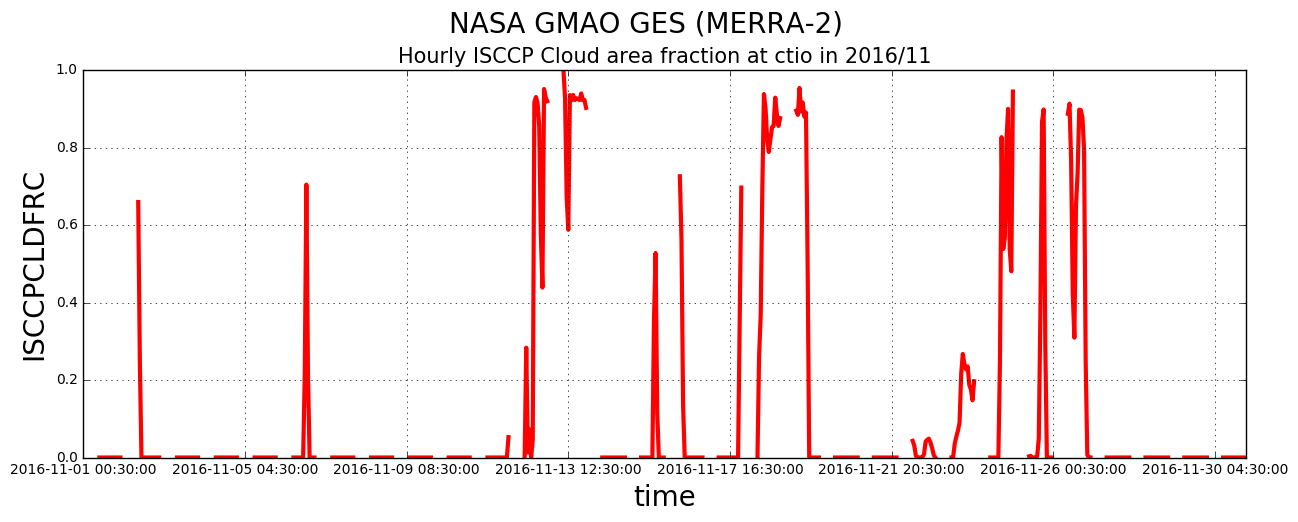

In [91]:
PlotTimeSeries(merra_csp,DATA_TAG1[0],DATA_TITLE1[0],'img0.pdf')

MDSH2OPATH
MODIS H2O path


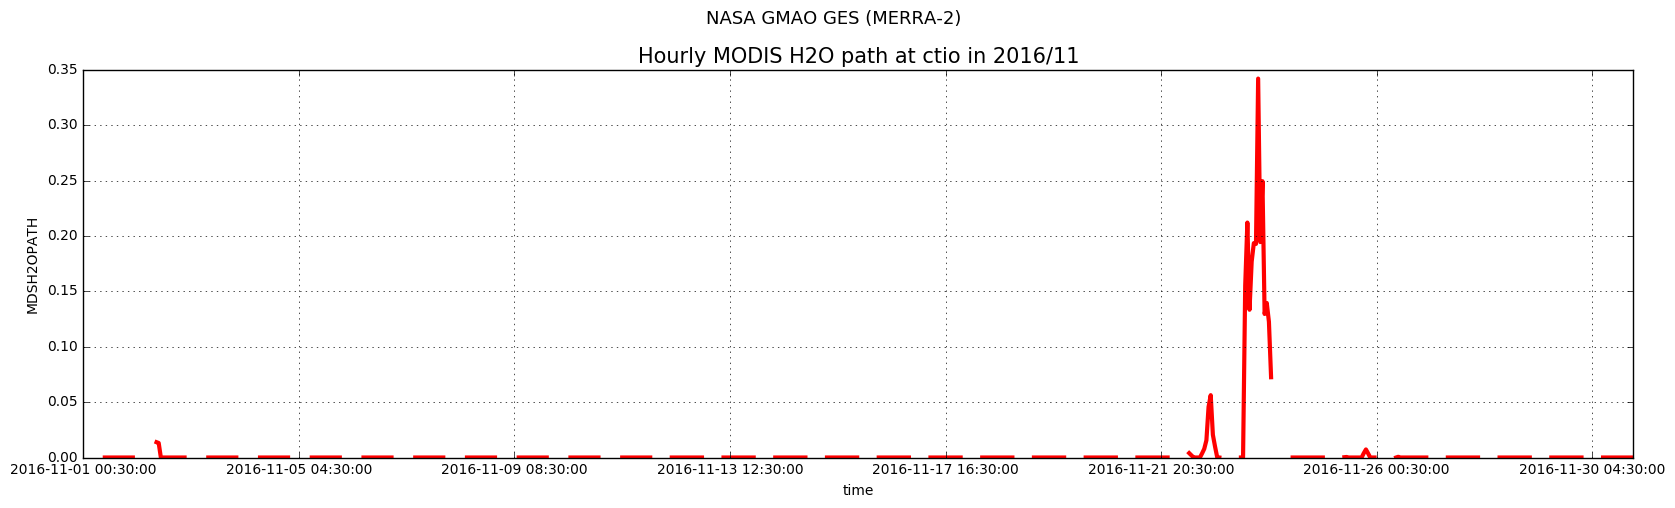

In [41]:
PlotTimeSeries(merra_csp,DATA_TAG1[1],DATA_TITLE1[1],'img1.pdf')

MDSICEPATH
MODIS ice path


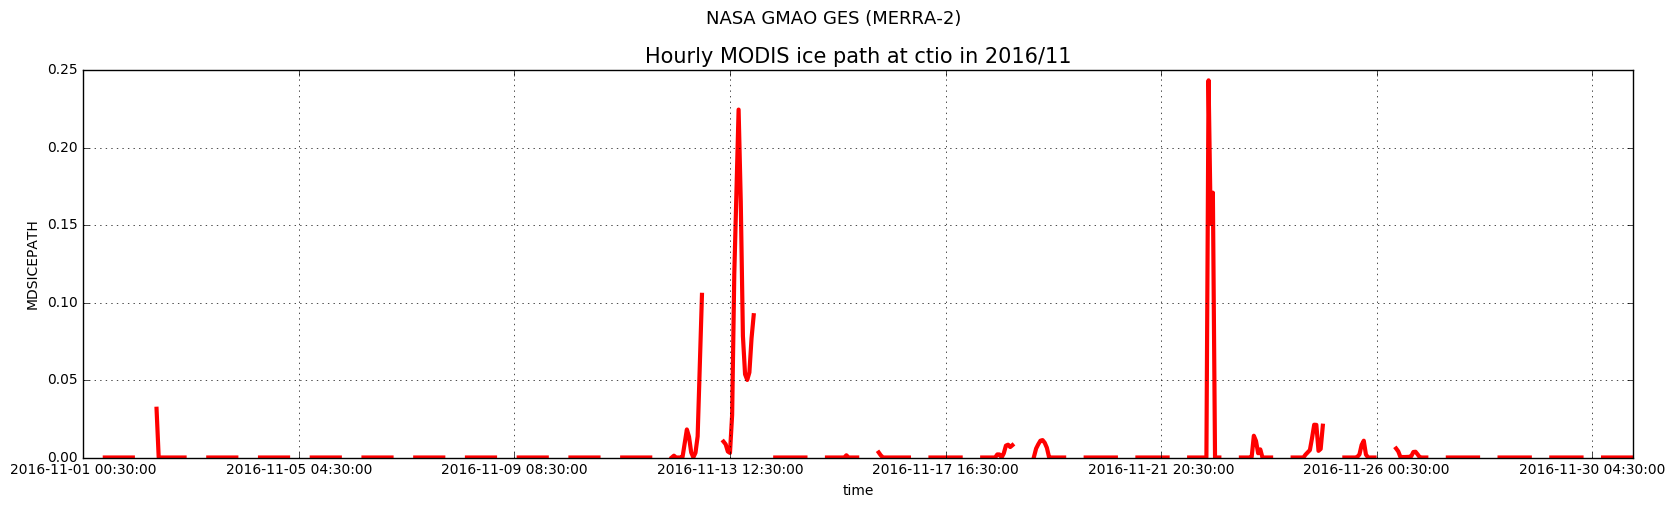

In [42]:
PlotTimeSeries(merra_csp,DATA_TAG1[2],DATA_TITLE1[2],'img2.pdf')

MDSOPTHCKH2O
MODIS H2O optical thickness


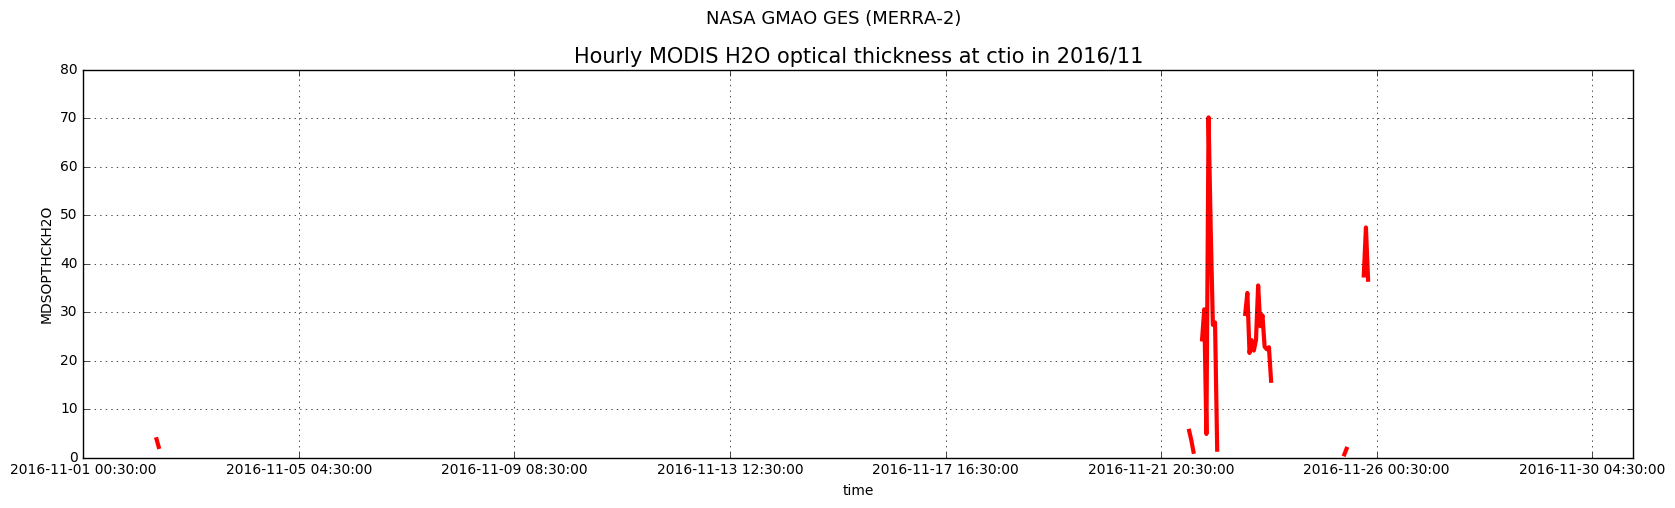

In [43]:
PlotTimeSeries(merra_csp,DATA_TAG1[3],DATA_TITLE1[3],'img3.pdf')

MDSOPTHCKICE
MODIS ice optical thickness


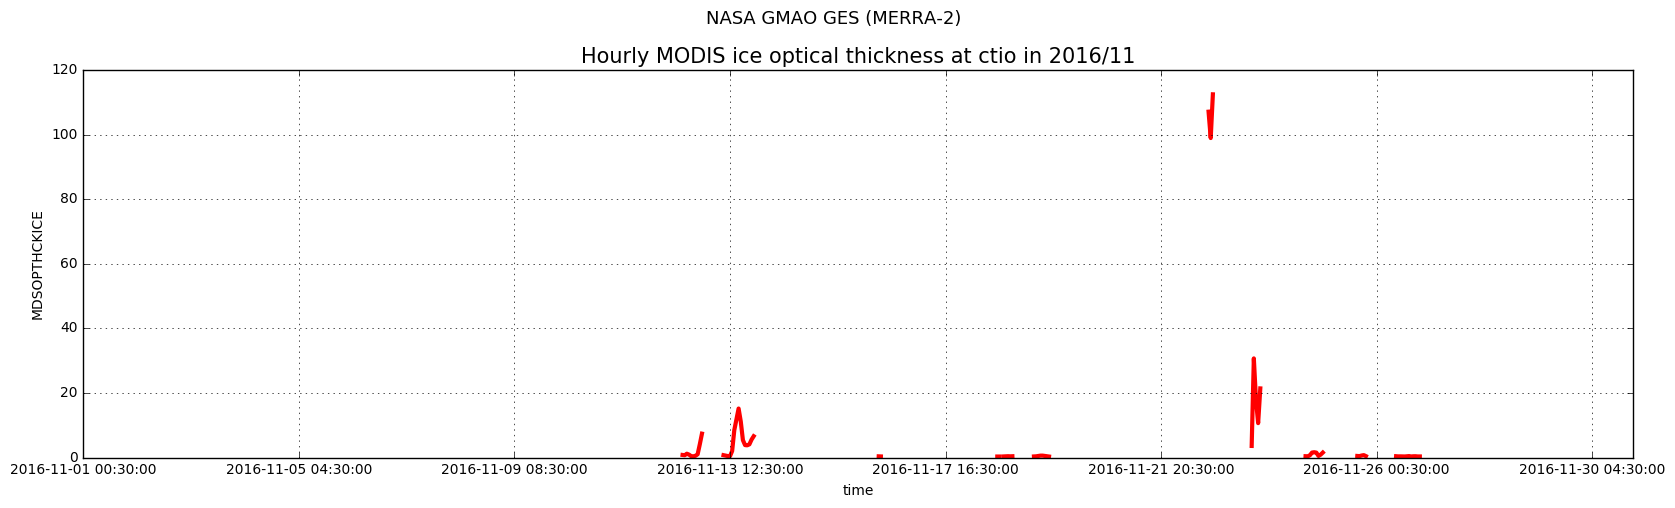

In [44]:
PlotTimeSeries(merra_csp,DATA_TAG1[4],DATA_TITLE1[4],'img4.pdf')

MDSOPTHCKTTL
MODIS total optical thickness


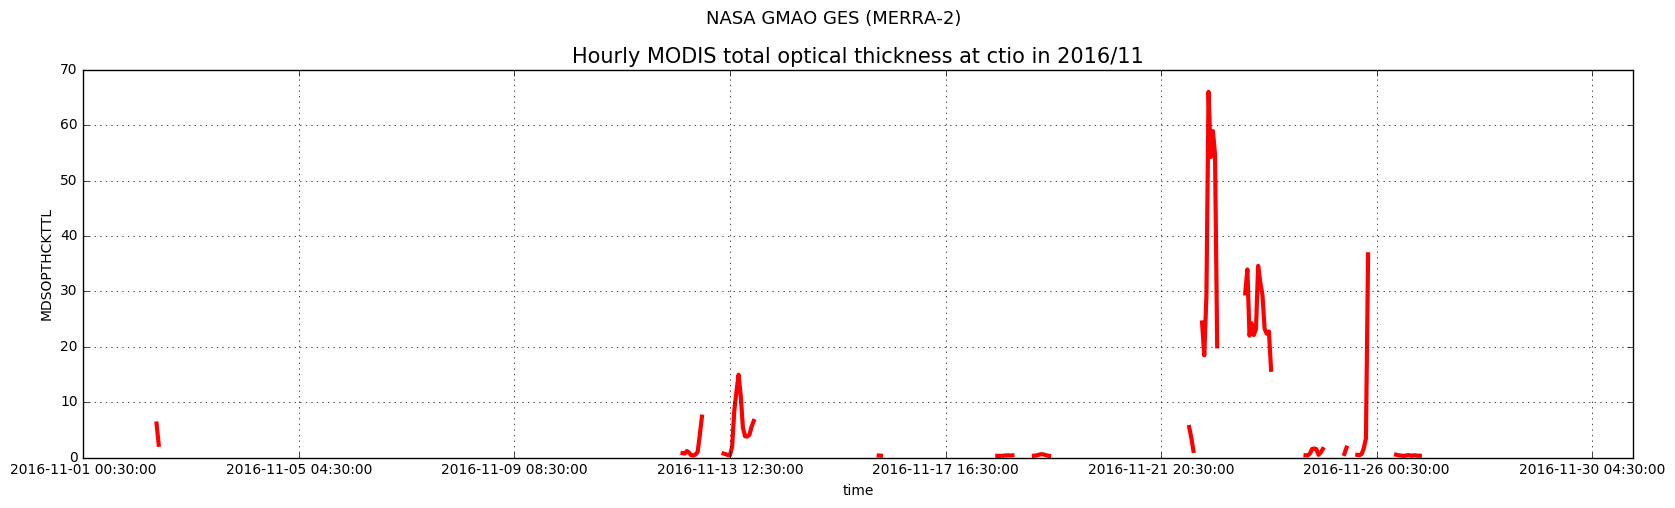

In [45]:
PlotTimeSeries(merra_csp,DATA_TAG1[5],DATA_TITLE1[5],'img5.pdf')

TOTANGSTR
Total Aerosol Angstrom parameter 470-870 nm


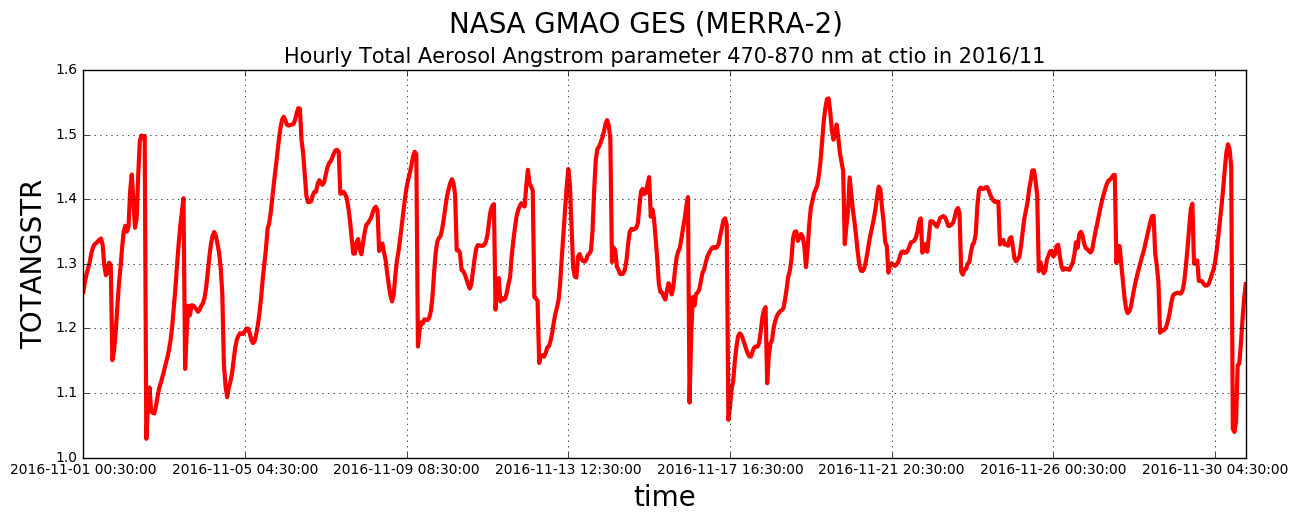

In [92]:
PlotTimeSeries(merra_aer,DATA_TAG2[0],DATA_TITLE2[0],'img6.pdf')

TOTEXTTAU
Total Aerosol Extinction AOT 550 nm


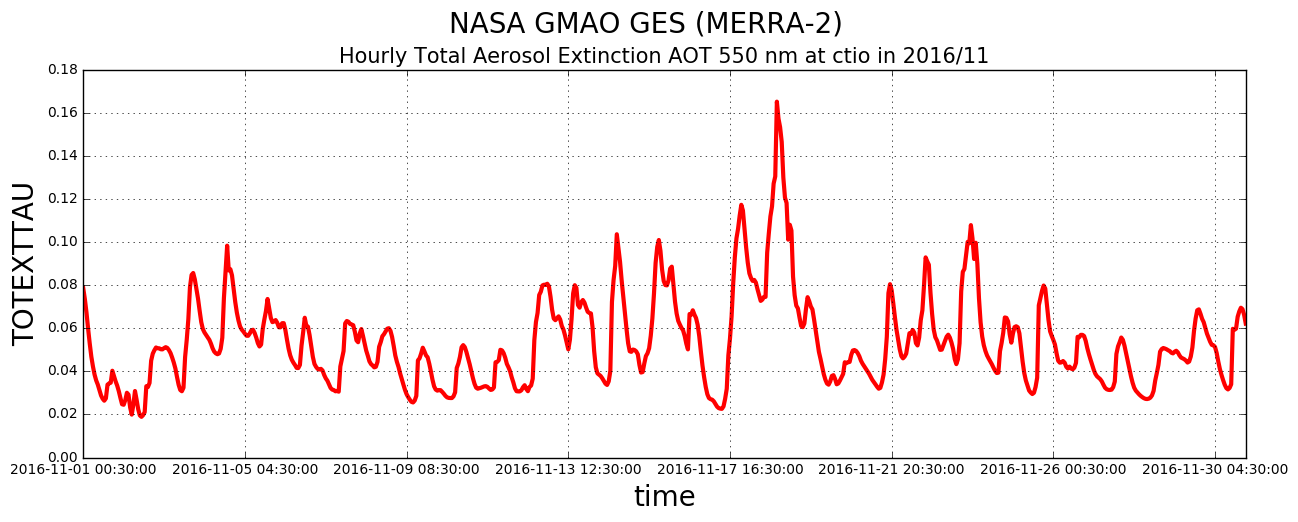

In [93]:
PlotTimeSeries(merra_aer,DATA_TAG2[1],DATA_TITLE2[1],'img7.pdf')

TOTEXTTAU
Total Aerosol Extinction AOT 550 nm


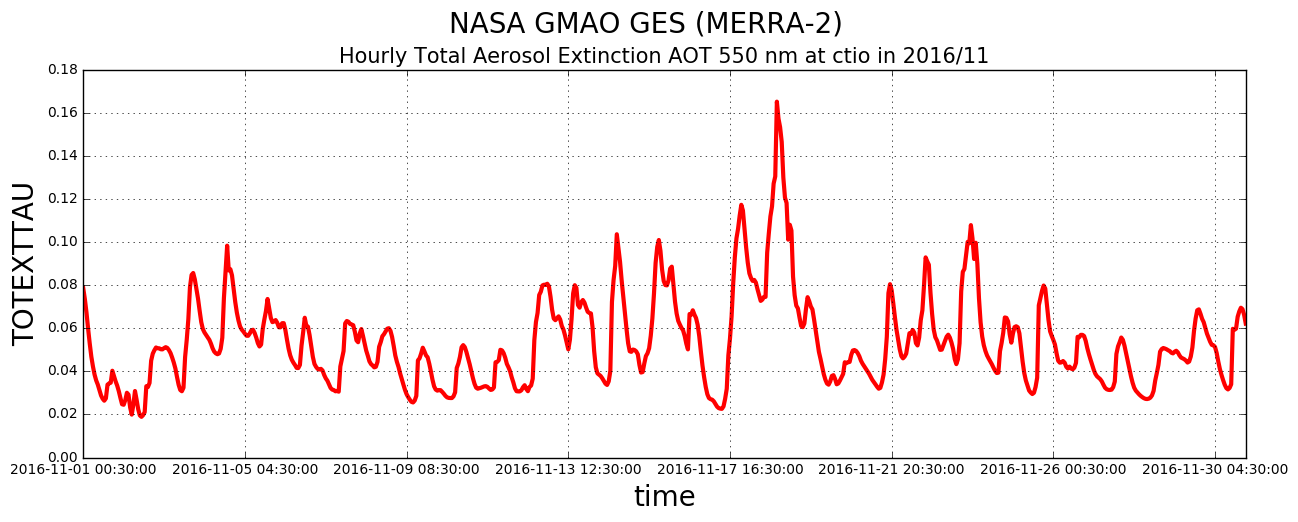

In [94]:
PlotTimeSeries(merra_aer,DATA_TAG2[1],DATA_TITLE2[1],'img8.pdf')

### Merra time

In [124]:
merra_timestamp=pd.to_datetime(merra_csp['time'])

In [129]:
TimeDiff=(np.abs(merra_timestamp-new_date_format[0]))

In [142]:
NBTIMEMERRA=len(TimeDiff)

In [135]:
TimeDiff.min()

Timedelta('0 days 00:15:29.665000')

In [128]:
(np.abs(merra_timestamp-new_date_format[0])).min()

Timedelta('0 days 00:15:29.665000')

In [143]:
timeshift= [TimeDiff[i].total_seconds() for i in range(NBTIMEMERRA) ]

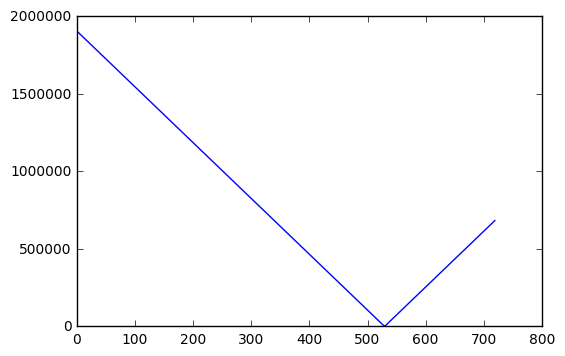

In [145]:
plt.plot(timeshift)

In [149]:
themin=np.array(timeshift).min()

In [153]:
indexmin=np.where(timeshift==themin)[0]

In [154]:
TimeDiff[indexmin]

time
2016-11-23 01:30:00   00:15:29.665000
Name: time, dtype: timedelta64[ns]

In [163]:
def GetMerraIndex():
    merra_indexes = []
    for i in range(NDATATIMES): # loop on data
        TimeDiff=(np.abs(merra_timestamp-new_date_format[i])) # compute the time difference merra- data
        NBTIMEMERRA=len(TimeDiff)
        timeshift= [TimeDiff[i].total_seconds() for i in range(NBTIMEMERRA) ]
        themin=np.array(timeshift).min()
        indexmin=np.where(timeshift==themin)[0]
        merra_indexes.append(indexmin[0])
    return np.array(merra_indexes)    

In [165]:
the_merra_indexes=GetMerraIndex()

In [189]:
merra_time_indexes=merra_csp['time'][the_merra_indexes]
ypoints=np.ones(NDATATIMES)*0.5
ts=pd.Series(ypoints,index=merra_time_indexes)

In [206]:
flags=np.zeros(NBTIMEMERRA)
flags[the_merra_indexes]=1

In [207]:
ts=pd.Series(flags,index=merra_csp['time'])

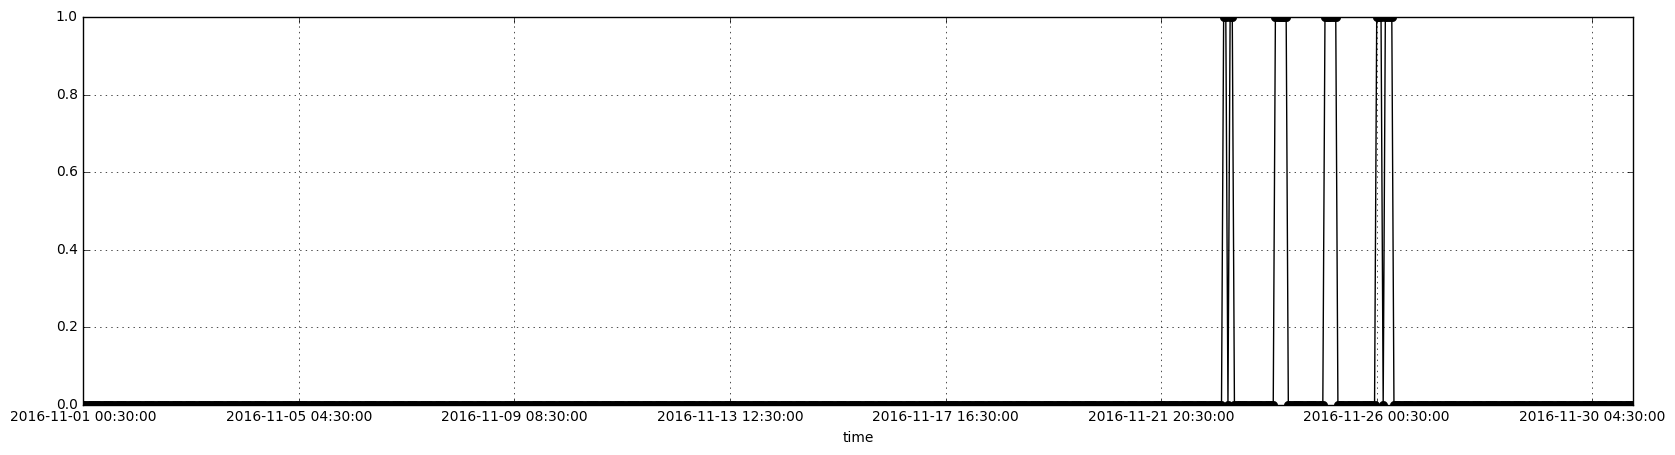

In [217]:
plt.figure(figsize=(20,5))
ts.plot(marker='o',lw=1,color='black')
plt.grid(True)

In [218]:
def PlotTimeSeries2(df,data_name,data_title,figfile,datatime):
    print data_name
    print data_title
    fig = plt.figure(figsize=(15,5), dpi=300)
    ax=fig.add_subplot(111)
    df.index=df['time']
    df[data_name].plot(lw=3,color='red',label='merra2')
    datatime.plot(marker='o',lw=1,color='black',label='data')
    datatime.plot()
    ax.set_xlabel('time',fontsize=20)
    ax.set_ylabel(data_name,fontsize=20)
    title= "Hourly {} at {} in 2016/{}".format(data_title,OBS_NAME,MONTH_NAME)
    ax.set_title(title,fontsize=15)
    fig.suptitle('NASA GMAO GES (MERRA-2)', y=1.02, fontsize=20)
    ax.grid(True)
    #plt.savefig(figfile)

ISCCPCLDFRC
ISCCP Cloud area fraction


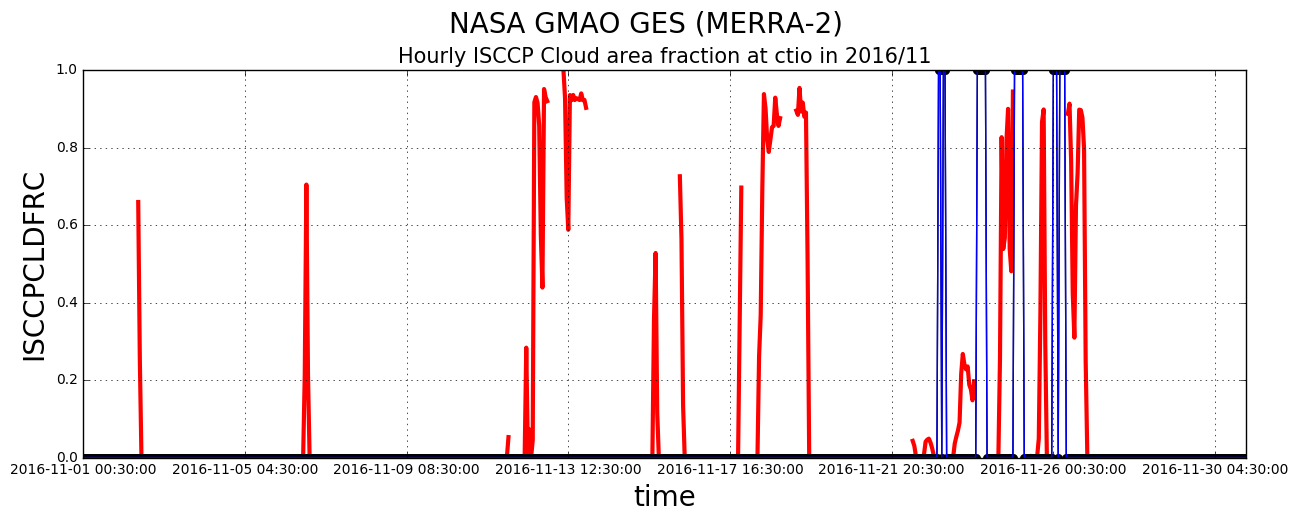

In [219]:
PlotTimeSeries2(merra_csp,DATA_TAG1[0],DATA_TITLE1[0],'img9.pdf',ts)